# Problem Statement

<li>Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.</li>
<li> Data Set Information:</li>

<ul><li>Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))</li>

<li>Prediction task is to determine whether a person makes over 50K a year. </li></ul>

<li>Listing of attributes:</li>
<ol><li>Income: >50K, <=50K. </li>
<li>age:final Weight(continuous).</li>
<li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
<li>fnlwgt: continuous.</li>
<li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
<li>education-num: continuous.</li>
<li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
<li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,Farm/ing-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
<li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</li>
<li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</li>
<li>sex: Female, Male.</li>
<li>capital-gain: continuous.</li>
<li>capital-loss: continuous.</li>
hours-per-week: continuous.</li>
<li>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad& Tobago, Peru, Hong, Holand-Netherlands.</li></ol>

# Importing Libraries

In [1]:
# Fundamental Packages of Python
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
import warnings

warnings.filterwarnings('ignore')

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset 

In [2]:
df_train = pd.read_csv('adult.data', delimiter=',')
df_test = pd.read_csv('adult.test', encoding='latin-1', delimiter=',', sep=',')

# Creating backup dataset

In [3]:
df_train_backup = df_train.copy(deep=True)
df_test_backup = df_test.copy(deep=True)
columns = [
    'age', 'work_class', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
    'income'
]
df_train_backup.columns = columns
df_test_backup.reset_index(inplace=True)
df_test_backup.columns = columns

# Preprocessing the Dataset

In [4]:
df_test.columns  # Test dataset has multiindex so have to convert back into columns
len(df_test.columns)
df_train.columns
len(df_train.columns)

Index(['|1x3 Cross validator'], dtype='object')

1

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

15

In [5]:
columns = [
    'age', 'work_class', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
    'income'
]

df_test = df_test.reset_index()

df_test.columns = columns
df_train.columns = columns

# Descriptive Analysis

In [6]:
df_train.shape
df_test.shape

(32560, 15)

(16281, 15)

In [7]:
df_train.info()
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   work_class      32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age                  73
work_class            9
fnlwgt            21647
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [8]:
df_test.info()
df_test.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   work_class      16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


age                  73
work_class            9
fnlwgt            12787
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        113
capital_loss         82
hours_per_week       89
native_country       41
income                2
dtype: int64

## Handling Garbage values in Dataset

Replacing garbage value (" ? ") with the null vlaues in dataset

In [9]:
df_train[df_train == ' ?'] = np.nan
df_test[df_test == ' ?'] = np.nan

# Nullvalue treatment

In [10]:
df_train.isna().sum()
pd.DataFrame(df_test.isna().sum(),columns=['No_of_NullValues'],index = df_test.columns)

age                  0
work_class        1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

,No_of_NullValues
age,0
work_class,963
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,966
relationship,0
race,0
sex,0


In [11]:
null_value_table_train=(df_train.isna().sum()/df_train.shape[0])*100
null_value_table_train
null_value_table_test=(df_test.isna().sum()/df_test.shape[0])*100
null_value_table_test

age               0.000000
work_class        5.638821
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660319
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790541
income            0.000000
dtype: float64

age               0.000000
work_class        5.914870
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.933296
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.682943
income            0.000000
dtype: float64

In [12]:
# Attributes with the Null values in Train dataset
null_cols_train = [col for col in df_train.columns
                     if df_train[col].isnull().any()] 
print(null_cols_train)
# Attributes with the Null values in Test dataset
null_cols_test = [col for col in df_test.columns
                     if df_test[col].isnull().any()] 
print(null_cols_test)

['work_class', 'occupation', 'native_country']
['work_class', 'occupation', 'native_country']


In [13]:
df_train[null_cols_train].dtypes 
df_train[null_cols_test].dtypes 

work_class        object
occupation        object
native_country    object
dtype: object

work_class        object
occupation        object
native_country    object
dtype: object

In [14]:
# As the attributes with are categorical so imputing the missing value with mode operation
for i in null_cols_train:
    print(i)
    df_train[i].fillna(df_train[i].mode()[0],inplace = True)
for i in null_cols_test:
    print(i)
    df_test[i].fillna(df_test[i].mode()[0],inplace = True)

work_class
occupation
native_country
work_class
occupation
native_country


## Cross checking the after NullValue treatment

In [15]:
pd.DataFrame(df_test.isna().sum(),columns=['No_of_NullValues'],index = df_test.columns)

,No_of_NullValues
age,0
work_class,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


## Descriptive analysis

In [16]:
df_train.describe()
df_test.describe()
df_train.describe(include='object')
df_test.describe(include='object')


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


,work_class,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27815,21789,29752,24719


,work_class,education,marital_status,occupation,relationship,race,sex,native_country,income
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,8,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,12173,5283,7403,2998,6523,13946,10860,14936,12435


## Categorical and Continous variables in Dataset

In [17]:
df_train.columns
len(df_train.columns)

Index(['age', 'work_class', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

15

In [18]:
df_train_backup.mean()

age                   38.581634
fnlwgt            189781.814373
education_num         10.080590
capital_gain        1077.615172
capital_loss          87.306511
hours_per_week        40.437469
dtype: float64

In [19]:
train_cont_col = df_train.mean().index# train continous columns
test_cont_col= df_test.mean().index # test continous columns

train_cat_col = [i for i in df_train.columns if i not in train_cont_col] # train categorical columns
test_cat_col = [i for i in df_train.columns if i not in test_cont_col] # test categrical columns

print('Total Number of train dataset columns = {}'.format(len(df_train.columns)))
print('Total Number of test dataset columns = {}'.format(len(df_test.columns)))
print('Number  of train dataset having continous = {} columns and categorical = {} columns'.format(len(train_cont_col),len(train_cat_col)))
print('Number  of train dataset having continous = {} columns and categorical = {} columns'.format(len(test_cont_col),len(test_cat_col)))

Total Number of train dataset columns = 15
Total Number of test dataset columns = 15
Number  of train dataset having continous = 6 columns and categorical = 9 columns
Number  of train dataset having continous = 6 columns and categorical = 9 columns


In [20]:
train_cont_col
test_cont_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [21]:
train_cat_col
test_cat_col

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

# Duplicate Values in Datasets

In [22]:
dub_train =df_train.duplicated(subset = None, keep = 'first') # train dataset has 24 duplicate records 
dub_test = df_test.duplicated(subset = None, keep = 'first')  # test dataset has 5 duplicate records

In [23]:
df_train[dub_train] # duplicate records of train dataset
df_test[dub_test] # duplicate records of train dataset

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.


## droping duplicates

<li>it's always a great notion of thought to remove duplicate data points from the dataset so the model can better generalize.</li>

In [24]:
df_train.drop_duplicates(inplace = True) # dropping dupicates
df_test.drop_duplicates(inplace = True)

In [25]:
df_train.duplicated().sum() # now zero duplicates in the train and test
df_test.duplicated().sum()

0

0

# Outlier Treatment

<lli>If outlier treatment is applied on this data set then the accuracy on linear regression is 43.76% which is model does not perform well so for this dataset </li>
<lil>outliers are not that effect for the generalization of the model.</lil>

In [26]:
import numpy as np
all_outliers=[]
df_train_outliers = pd.DataFrame()
def outliers(df_train):
    for i in df_train[train_cont_col]:
        q1=np.quantile(df_train[i].values,0.25)
        q3=np.quantile(df_train[i].values,0.75)
        iqr=q3-q1
        utv=q3+1.5*(iqr)
        ltv=q1-1.5*(iqr)
        outliers_data=[]
        x=[]
        for j in df_train[i].values:
            if (j<ltv) or (j>utv):
                all_outliers.append(j)
                x.append(df_train[i].median())
            else:
                x.append(j)
        all_outliers.append([i,outliers_data])
        df_train_outliers[i]=x
outliers(df_train)

In [27]:
[df_train_outliers[i].unique() for i in df_train_outliers]

[array([50., 38., 53., 28., 37., 49., 52., 31., 42., 30., 23., 32., 40.,
        34., 25., 43., 54., 35., 59., 56., 19., 39., 20., 45., 22., 48.,
        21., 24., 57., 44., 41., 29., 18., 47., 46., 36., 27., 67., 33.,
        76., 17., 55., 61., 70., 64., 71., 68., 66., 51., 58., 26., 60.,
        75., 65., 77., 62., 63., 72., 74., 69., 73., 78.]),
 array([ 83311., 215646., 234721., ...,  34066.,  84661., 257302.]),
 array([13.,  9.,  7., 14.,  5., 10., 12., 11., 16., 15.,  6.,  8.]),
 array([0.]),
 array([0.]),
 array([40., 45., 50., 35., 52., 44., 38., 43., 48., 41., 36., 46., 42.,
        34., 33., 47., 37., 39., 49., 51.])]

<li> Observations: If the outliers are exsist in dataset, great care should be taken, because even the domain expertise would get confuse in some scenarios.</li>
<li>Though here there are outliers in the data but have to consider them and with removing them resulting a dumb model</li>

<AxesSubplot:xlabel='age'>

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

Text(0.5, 0, 'age_outliers')

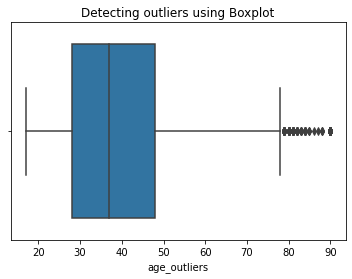

In [28]:
sns.boxplot(df_train_backup.age) 
plt.title("Detecting outliers using Boxplot")
plt.xlabel('age_outliers')
# Observations : there seems to be no outliers in age attribute but a human life span 
# could be up to 100years which is not to consider the above 80 years as outliers in this plot

<AxesSubplot:xlabel='fnlwgt'>

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

Text(0.5, 0, 'fnlwgt_outliers')

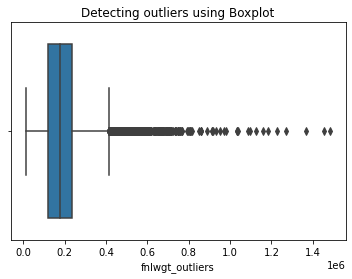

In [29]:
sns.boxplot(df_train_backup.fnlwgt)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('fnlwgt_outliers')

 fnlwgt is the weights on the current population survey in U.S based on following 
     A single cell estimate of the population 16+ for each state.
     Controls for Hispanic Origin by age and sex.
     Controls by Race, age and sex.

Observations : Outliers in this could be also should handled by the domain experty.

<AxesSubplot:xlabel='capital_loss'>

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

Text(0.5, 0, 'capital_loss_outliers')

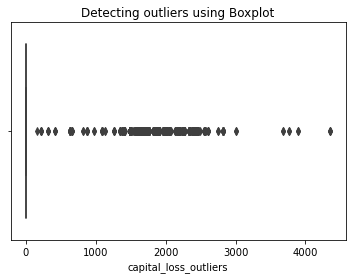

In [30]:
sns.boxplot(df_train_backup.capital_loss) # in here Outliers are away more than the 
plt.title("Detecting outliers using Boxplot")
plt.xlabel('capital_loss_outliers')

## Effect of performing outliers on this perticular dataset

In [31]:
df_train_backup.capital_loss.value_counts()
print('value count of zeros in the capital_loss attricute is {}'.format(
    (df_train_backup.capital_loss.value_counts()[0] /
    df_train.capital_loss.count())*100))
print('value count of zeros in the capital_gain attricute is {}'.format(
    (df_train_backup.capital_gain.value_counts()[0] /
    df_train.capital_gain.count())*100))
# the value count of 0 is captial_loss and capital_gain is more than 90% values in the 
# columns so if outliers are appiled than the hole columns has got to remove the values

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

value count of zeros in the capital_loss attricute is 95.40508974674206
value count of zeros in the capital_gain attricute is 91.74145561839194


In [32]:
[[df_train[i].unique(),i] for i in df_train.columns]
# consider the columns 'capital_gain' & 'capital_loss' performing 
# outliers on this columns results in all zeros instances in the dataset

[[array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
         35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
         46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
         26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
         83, 84, 85, 86, 87], dtype=int64),
  'age'],
 [array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
         ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
        dtype=object),
  'work_class'],
 [array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64),
  'fnlwgt'],
 [array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
         ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
         ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
         ' Preschool', ' 12th'], dtype=object),
  'education'],
 [array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
        dtype=int64),

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1e6fb7760>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1e6fb7e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1e6fb7400>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1e6fc4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1e6fc48b0>],
 'means': []}

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

Text(0.5, 0, 'output of Outliers on capital_loss')

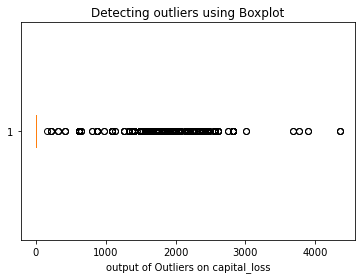

In [33]:
plt.boxplot(df_train.capital_loss, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('output of Outliers on capital_loss')

# Expolratory Data Analysis

In [34]:
corr_train = df_train.corr()
corr_test = df_test.corr()

In [35]:
corr_train.isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

<Figure size 1080x648 with 0 Axes>

<AxesSubplot:>

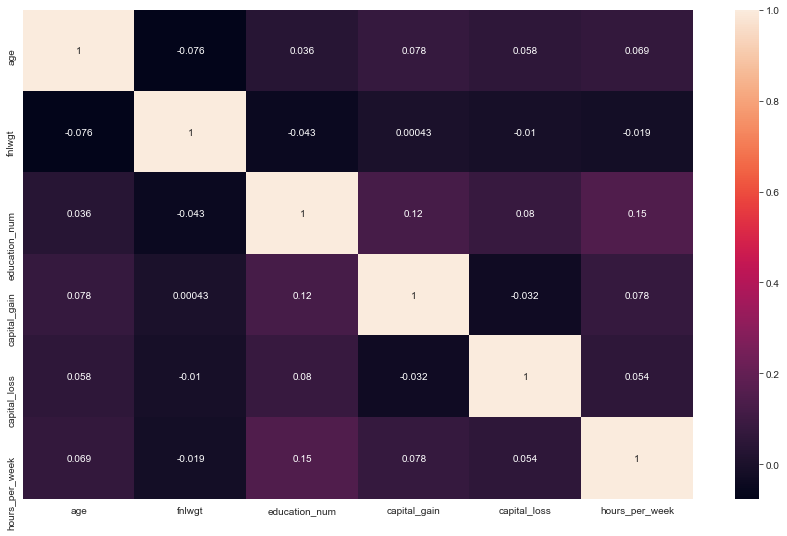

In [36]:
plt.figure(figsize = (15,9))
sns.set_style('white')
sns.heatmap(corr_train,annot = True)

 <li> Observations: Following obserations were taken from the correlation heatmap</li>
<ol><li> Education was corelated with the hours per week and capital gain</li></ol>

<Figure size 1080x648 with 0 Axes>

<AxesSubplot:>

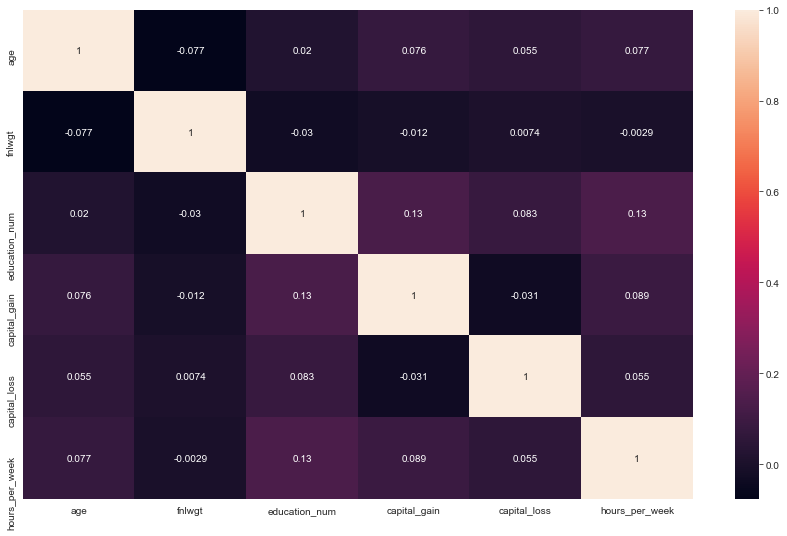

In [37]:
plt.figure(figsize = (15,9))
sns.set_style('white')
sns.heatmap(corr_test,annot = True)

 <li> Following obserations were taken from the correlation heatmap</li>
<ol><li> Education was corelated with the hours per week and capital gain</li></ol>

In [38]:
df_train['age_range'] = pd.cut(df_train['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
df_test['age_range'] = pd.cut(df_train['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Figure size 1440x648 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='income', ylabel='count'>

Text(0.5, 1.0, 'Income Wrt occupation')

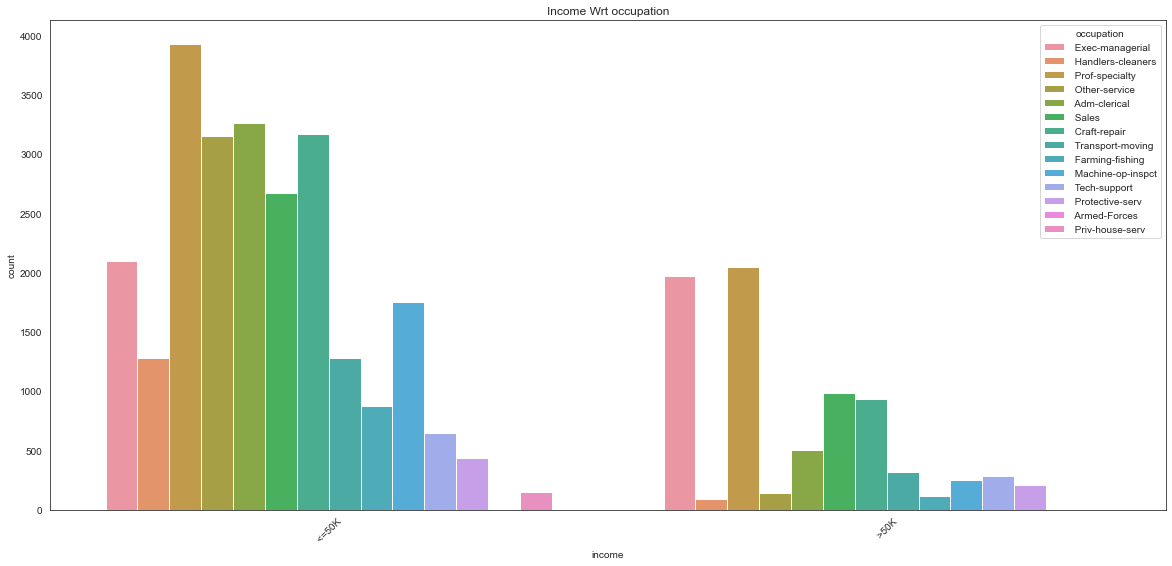

In [39]:
plt.figure(figsize = (20,9))
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = df_train)
plt.title('Income Wrt occupation')

Observations: 
<ol><li>Most of the professional speciality were earns <=50K 
and second were sales,other services,, administration clerical level proffesions were <=50k </li>
<li>Most of prof_specially occupations was earning >50K and second were private houses service professionals </ol>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='occupation', ylabel='count'>

Text(0.5, 1.0, 'Occupation along with work_class')

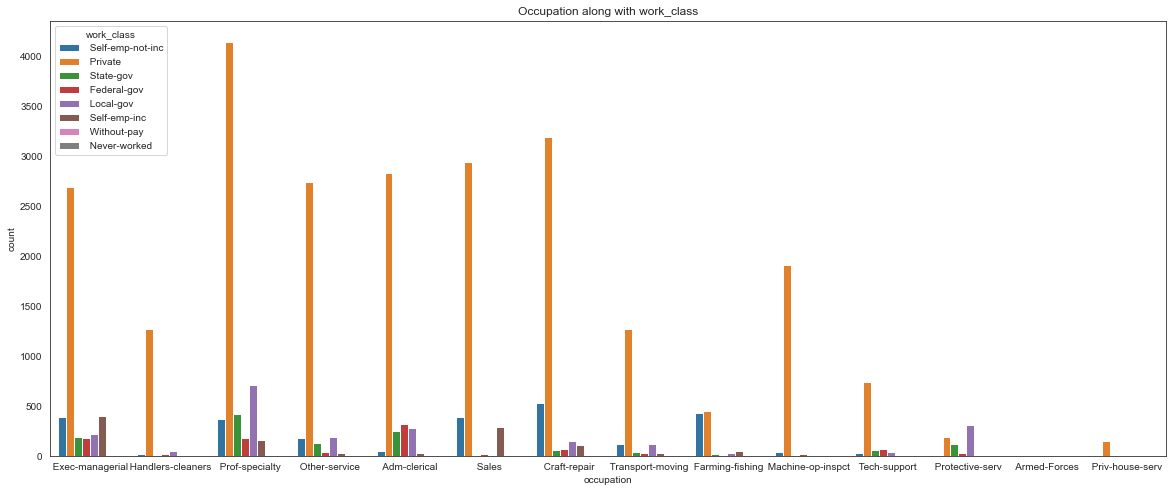

In [40]:
plt.figure(figsize =(20,8))
sns.countplot(df_train.occupation,hue = df_train['work_class'])
plt.title('Occupation along with work_class')

Observations: 
<ol><li>Most of the professions were from the private working classand second was local government</li>
<li>Most of prof_specially occupations was from the private working class from the above graph</ol>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='occupation', ylabel='count'>

Text(0.5, 1.0, 'Education wrt occupation')

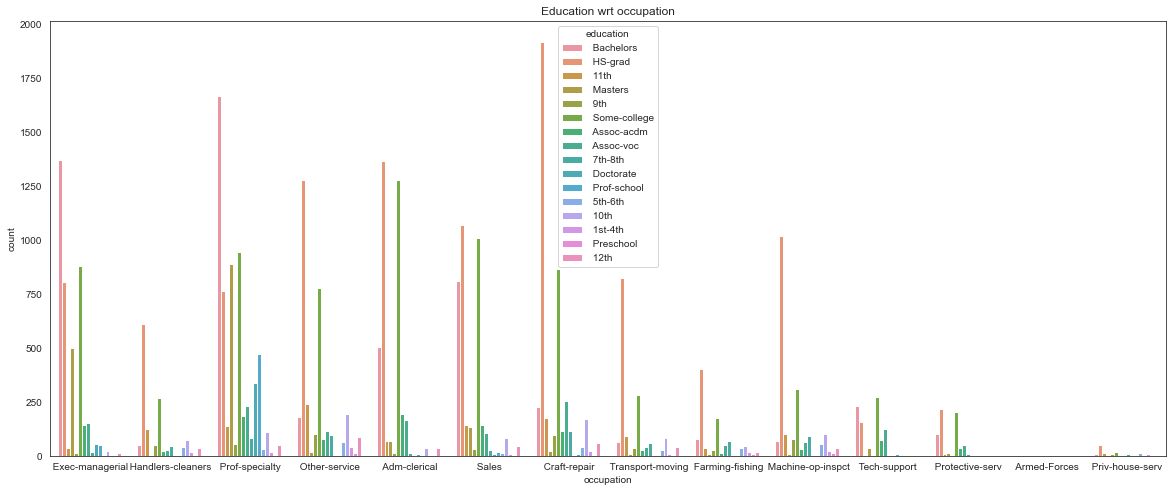

In [41]:
plt.figure(figsize =(20,8))
sns.countplot(df_train.occupation,hue = df_train['education'])
plt.title('Education wrt occupation')

Observations: 
<ol><li>Most of the professions were the education profile was Bachelors and second was some college</li>
<li>Most of the professions were the prof-speciality and second highest is managerial rolesm</ol>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='work_class', ylabel='count'>

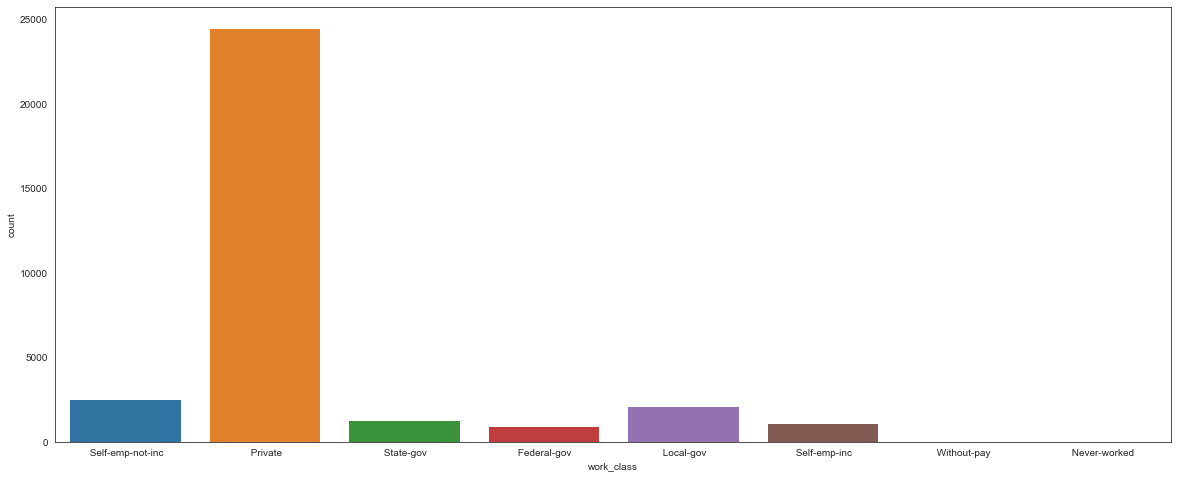

In [42]:
plt.figure(figsize =(20,8))
sns.countplot(df_train.work_class)

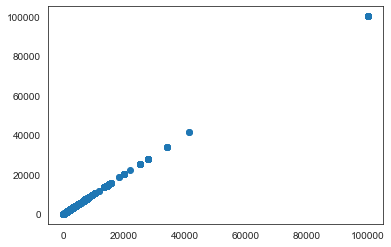

In [43]:
plt.scatter(df_train.capital_gain,df_train.capital_gain)

<li>Observations: relations ship between the capital gain and capital loss is linear relationship, i.e., as the loss is increasing and gain also increasing</li>

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='education', ylabel='count'>

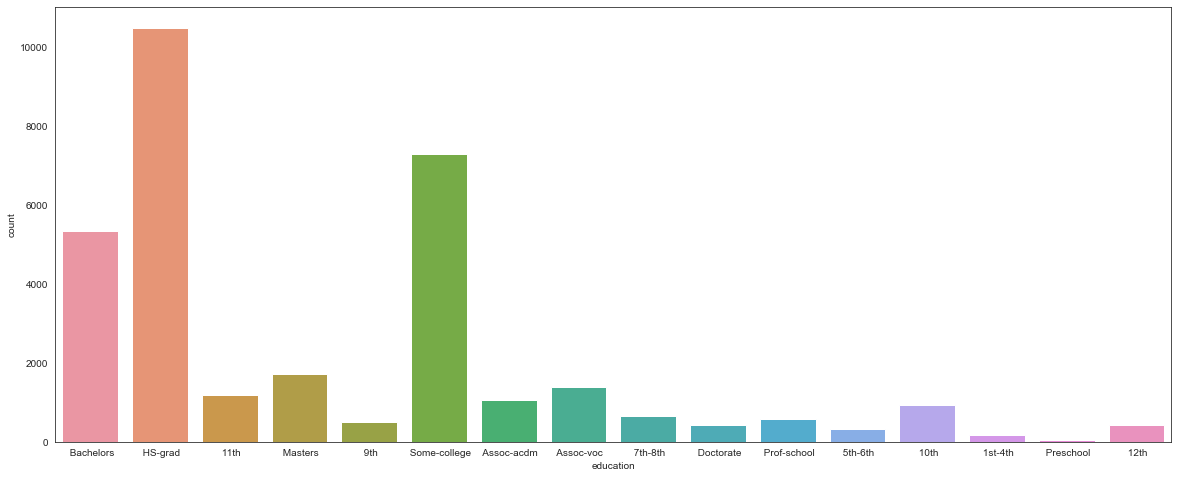

In [44]:
plt.figure(figsize =(20,8))
sns.countplot(df_train.education)

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='capital_gain', ylabel='Density'>

<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

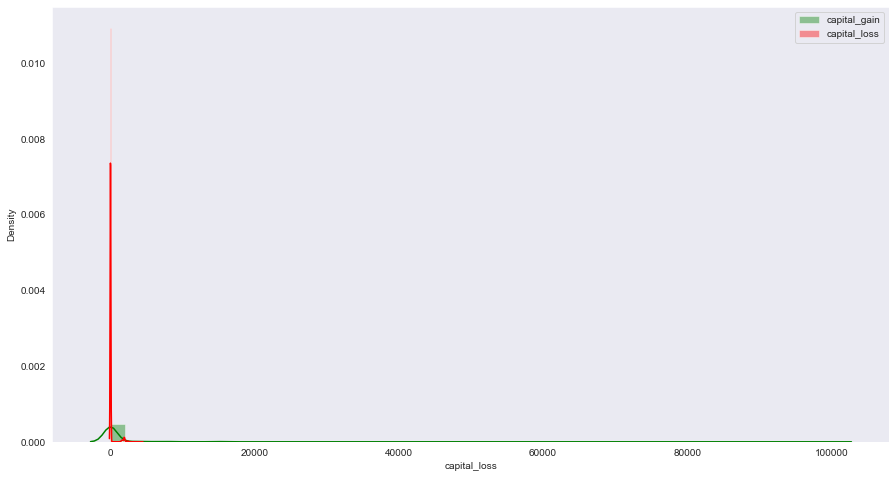

In [45]:
plt.figure(figsize = (15,8))
sns.set_style('dark')
sns.distplot(df_train.capital_gain,color = 'green',label = 'capital_gain',kde = True)
sns.distplot(df_train.capital_loss,color = 'red',label = 'capital_loss',kde = True)
plt.legend()

Observations: The above dist plot shows the lass is more than the gain in capital

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='occupation', ylabel='capital_gain'>

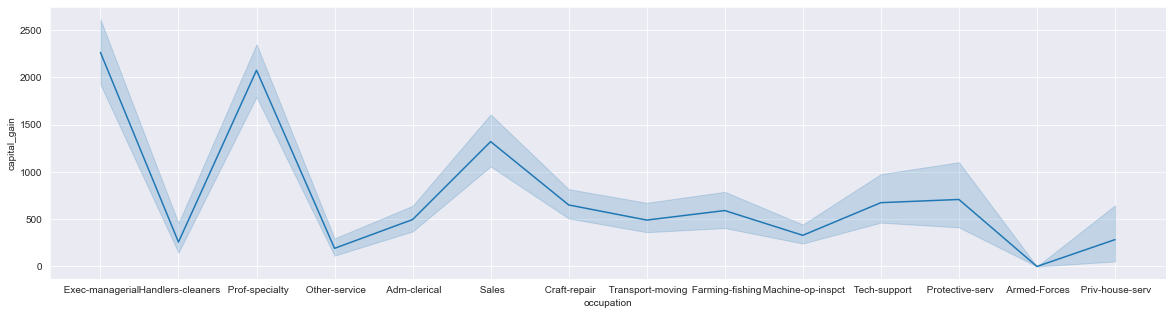

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
sns.lineplot(df_train.occupation,df_train.capital_gain,)

Obsevations: The above linediagram shows that executive level managerials have high gain than the other professionsm

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='age_range', ylabel='count'>

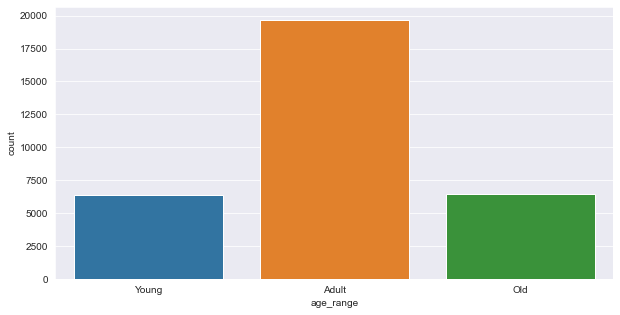

In [47]:
plt.figure(figsize =(10,5))
sns.countplot(df_train.age_range)

Observations: Most of them are adult who's age ranges from 25 to 50 years in the survery

[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

<AxesSubplot:xlabel='income', ylabel='count'>

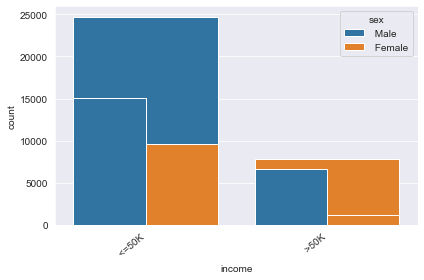

In [48]:
ax = sns.countplot(x="income", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
sns.countplot(x = 'income', hue = 'sex', data = df_train)
plt.show()

In [49]:
pd.crosstab(df_train.sex,df_train.income)

income,<=50K,>50K
sex,,
Female,9583,1179
Male,15114,6660


<li>Observations: In the given survery, most of the male  (61.19%)candidates and (38.80%) were female in earning " <=50K ".</li>
<li>(15.04%) approx were male and 84.95% were female in earning in " >50K "</li>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='income', ylabel='count'>

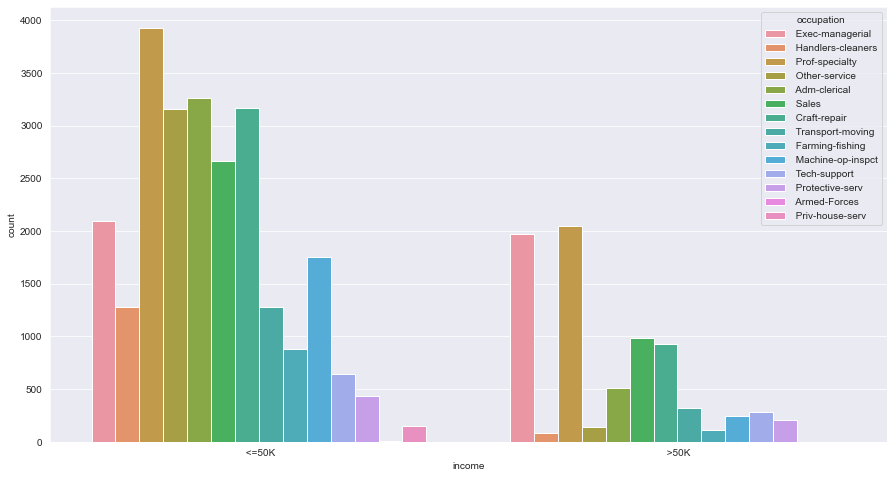

In [50]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'income', hue = 'occupation', data = df_train)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='income', ylabel='count'>

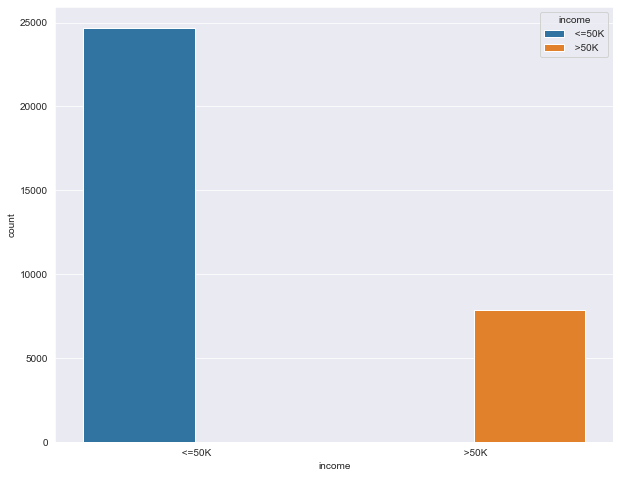

In [51]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'income', hue = 'income', data = df_train)

In [52]:
df_train.income.value_counts()

 <=50K    24697
 >50K      7839
Name: income, dtype: int64

In [53]:
(7839/(24697+7839))*100

24.093312023604625

<li>Observations: The records with 75.90% were who have <=50K income and remaining were 24.093% who are >50K income</li>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>]], dtype=object)

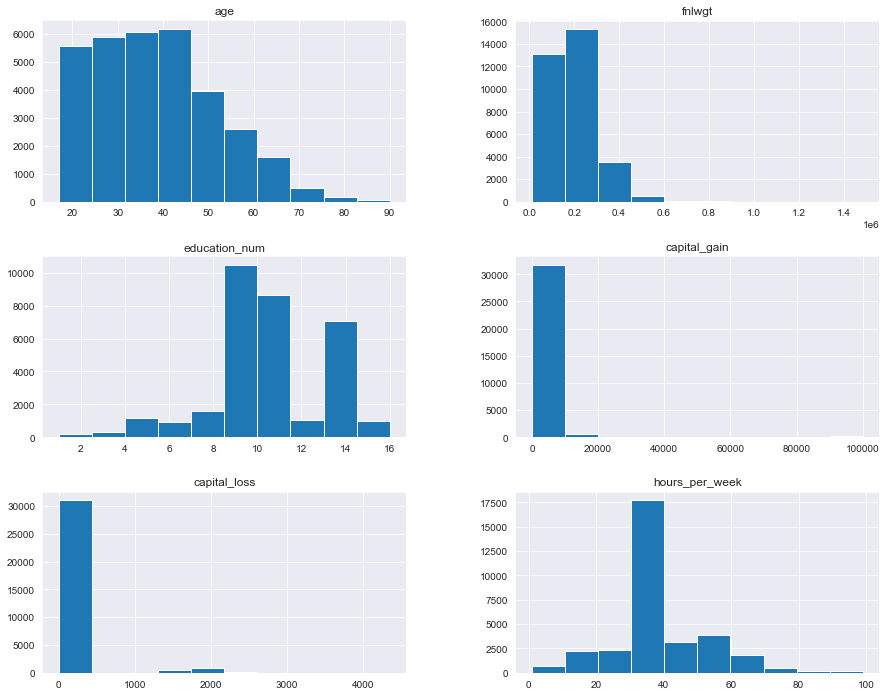

In [54]:
rcParams['figure.figsize'] = 15, 12
df_train[['age', 'fnlwgt', 'education_num', 'capital_gain','sex', 'capital_loss','hours_per_week']].hist()

Observations: In the above histogram graphs we can identify that the distribution of each numberical attributes where
    main obserations are:
        <ol> <li> Age attribute is skewed to wards right side</li>
        <li> Capital gain and captial loss were most of the zeros </li>
        <li> Education wise were 10 and above degrees where recorded in survey</li>
<li> No. of hours per week was mostly around 40 hours</ol>

# Pandas Profiling

In [55]:
from pandas_profiling import profile_report
pr = profile_report
train_profiling = pr.ProfileReport(df_train)
test_profiling = pr.ProfileReport(df_test)

In [56]:
test_profiling.to_file('case_test_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
train_profiling.to_file('case_train_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model selection

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train = df_train.drop('income',axis = 1)
y_train = df_train.income

In [59]:
x_test = df_test.drop('income',axis = 1)
y_test = df_test.income

# Encoding the Categorical Variables

In [60]:
from sklearn.preprocessing import LabelEncoder

 Train dataset categirical features label encoding

In [61]:
le = LabelEncoder()
for i in x_train:
    col = le.fit_transform(x_train[i])
    x_train[i] = col
col = le.fit_transform(y_train)
y_train = col

Test dataset categorical columns label encoding

In [62]:
le = LabelEncoder()
for i in x_test:
    col = le.fit_transform(x_test[i])
    x_test[i] = col
col = le.fit_transform(y_test)
y_test = col

# Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32536 non-null  int64   
 1   work_class      32536 non-null  object  
 2   fnlwgt          32536 non-null  int64   
 3   education       32536 non-null  object  
 4   education_num   32536 non-null  int64   
 5   marital_status  32536 non-null  object  
 6   occupation      32536 non-null  object  
 7   relationship    32536 non-null  object  
 8   race            32536 non-null  object  
 9   sex             32536 non-null  object  
 10  capital_gain    32536 non-null  int64   
 11  capital_loss    32536 non-null  int64   
 12  hours_per_week  32536 non-null  int64   
 13  native_country  32536 non-null  object  
 14  income          32536 non-null  object  
 15  age_range       32536 non-null  category
dtypes: category(1), int64(6), object(9)
memory usage: 5.0+ MB


In [65]:
x_train.shape
y_train.shape

x_test.shape
y_test.shape

(32536, 15)

(32536,)

(16276, 15)

(16276,)

In [66]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [67]:
len(x_train),len(x_test),len(y_train),len(y_test)

(32536, 16276, 32536, 16276)

# Logistics Model building

In [68]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [153]:
lr_prediction = model.predict(x_test)
lr_predict_proba = model.predict_proba(x_test)[:,1]
lr_prediction
lr_predict_proba

array([0, 0, 0, ..., 1, 1, 0])

array([0.02365257, 0.22653988, 0.18805518, ..., 0.52308114, 0.85271816,
       0.37570786])

## Accuracy score Logistic Regression Classifier

In [173]:
Train_model_score = model.score(x_train,y_train)
Test_model_score = model.score(x_test,y_test)
print("Train dataset score: {}".format(Train_model_score*100))
print("Train dataset score: {}".format((Test_model_score*100)))

Train dataset score: 82.6592082616179
Train dataset score: 81.73998525436225


<li> Observations: the score of the training set is 82.66 and the test dataset is 81.72 </li>

## classification report

In [73]:
from sklearn.metrics import classification_report

In [74]:
cr = classification_report(y_test,lr_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12430
           1       0.70      0.40      0.51      3846

    accuracy                           0.82     16276
   macro avg       0.77      0.67      0.70     16276
weighted avg       0.80      0.82      0.80     16276



## Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual_>50K'), Text(0, 1.5, 'Actual_<=50K')])

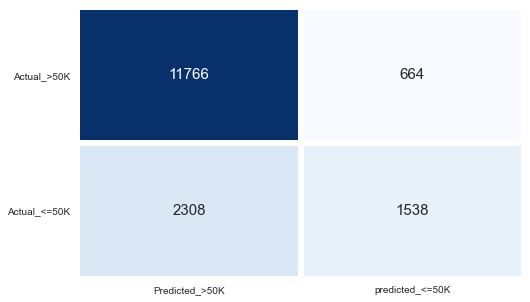

In [77]:
cm = confusion_matrix(y_test,lr_prediction)
sns.set_style('darkgrid')
plt.figure(figsize = (8, 5))
cols =['Predicted_>50K','predicted_<=50K']
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Actual_>50K','Actual_<=50K'], xticklabels = cols)
plt.yticks(rotation = 0)
plt.show()

## Roc Curve analysis for Linear Regression 

In [165]:
print('ROC AUC score for Logistic Regression: {}'.format((roc_auc_score(y_test,lr_predict_proba))*100))

ROC AUC score for Logistic Regression: 83.50643374085729


In [159]:
print(f'ROC AUC score: {roc_auc_score(y_test,lr_predict_proba)}')

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, lr_predict_proba)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, lr_predict_proba))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random forest clasifier

## Randomforest building

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
rf_classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

## Predicting

In [138]:
y_pred = rf_classifier.predict(x_test)
y_prob = rf_classifier.predict_proba(x_test)[:,1]
y_pred
y_prob

array([0, 0, 1, ..., 1, 0, 1])

array([0.  , 0.17, 0.59, ..., 0.51, 0.24, 0.71])

## Confusion Matrix Randomforest 

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual_>50K'), Text(0, 1.5, 'Actual_<=50K')])

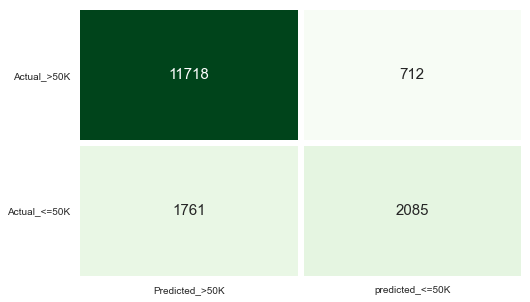

In [97]:
cm_randomforest = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm_randomforest, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Actual_>50K','Actual_<=50K'], xticklabels = cols)
plt.yticks(rotation = 0)
plt.show()

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12430
           1       0.75      0.54      0.63      3846

    accuracy                           0.85     16276
   macro avg       0.81      0.74      0.77     16276
weighted avg       0.84      0.85      0.84     16276



## Accuracy score RandomForest Classifier

In [103]:
train_score = rf_classifier.score(x_train,y_train)*100
test_score = rf_classifier.score(x_test,y_test)*100
train_score
test_score

99.9938529628719

84.80584910297371

## Roc curve RandomForest Classifier

In [167]:
print(f'ROC AUC score for RandomForest Classifier: {roc_auc_score(y_test,y_prob)*100}')

ROC AUC score for RandomForest Classifier: 89.58083729624326


ROC AUC score: 0.8958083729624325
roc_auc_score for DecisionTree:  0.8958083729624325


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 1.0, 'Receiver Operating Characteristic - DecisionTree')

([<matplotlib.lines.Line2D at 0x1d195790250>],
 [<matplotlib.lines.Line2D at 0x1d1957905b0>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

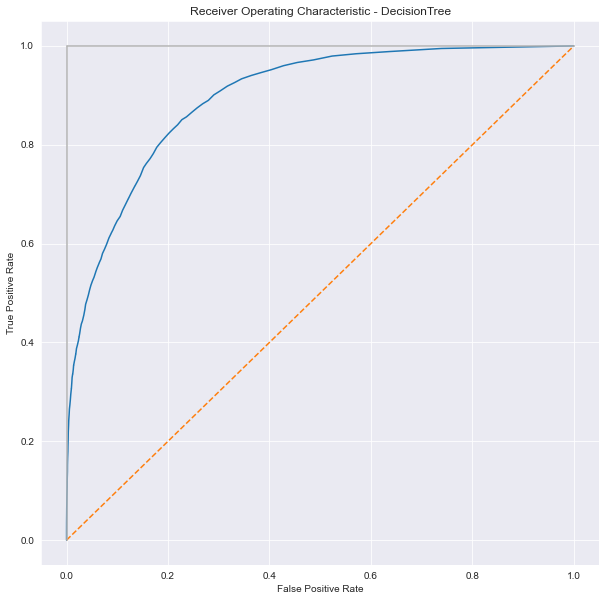

In [158]:
print(f'ROC AUC score: {roc_auc_score(y_test,y_prob)}')

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_prob)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_prob))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# conclusion

<li>By the given "Census Income prediction" Dataset, Considering two Machine learning Supervisied Algorithms,Following were the result of Logistics Regression and RandomForest Classifiers</li>
<li> Logistic Regression:</li>
<ul><li>Train dataset score: 82.65%</li>
<li>Train dataset score: 81.73%</li>
<li>ROC Curve score for logistic regressin: 83.50</li></ul>

<li> Random Forest Classifier:</li>
<ul><li>Train dataset score: 99.99%</li>
<li>Train dataset score: 84.80%</li>

   <li> with roc score for logistic regressin: 89.58</li>

</ul>